In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
df = pd.read_csv('movie_dataset.csv')

In [41]:
df.head()

,Unnamed: 0,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,0.0,237000000.0,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995.0,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1,1.0,300000000.0,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285.0,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2,2.0,245000000.0,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647.0,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3,3.0,250000000.0,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026.0,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4,4.0,260000000.0,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529.0,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [9]:
df.shape[0]

4807

In [10]:
df.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4802,4802,0.0,Documentary,NaN,25975.0,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16.0,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger
4803,4803,NaN,Action,NaN,NaN,space culture clash,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Name,NaN,NaN,XYZ,NaN,Director
4804,4804,NaN,Fantasy Action Adventure,NaN,NaN,magical universe children school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Harry Potter,NaN,NaN,Daniel Radcliffe Emma Watson,NaN,Director
4805,4805,NaN,Fantasy Action Adventure,NaN,NaN,magical universe children school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Testing,NaN,NaN,Daniel Radcliffe Emma Watson,NaN,Director
4806,4806,NaN,Fantasy Action Adventure,NaN,NaN,fighting action romance,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Knight & Day,NaN,NaN,Tom Cruise,NaN,IDK


In [11]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [12]:
df.shape

(4807, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4807 non-null   int64  
 1   budget                4803 non-null   float64
 2   genres                4779 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   float64
 5   keywords              4395 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   float64
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [23]:
type(df.iloc[4803]['director'])

str

<AxesSubplot:>

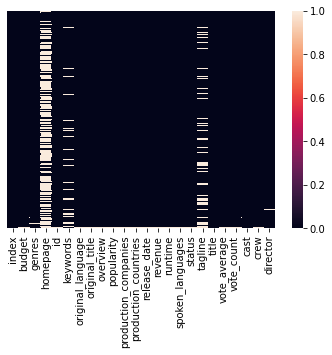

In [24]:
sns.heatmap(df.isnull(), yticklabels=False)

In [25]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [26]:
featuresList = ['genres', 'keywords', 'cast', 'director']

In [27]:
def combineFeatures(row):
    return row['genres'] + " " + row['keywords'] + " " + row['cast'] + " " + row['director']

In [28]:
for features in featuresList:
    df[features] = df[features].fillna(' ')

<AxesSubplot:>

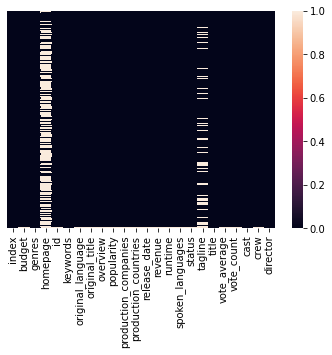

In [29]:
sns.heatmap(df.isnull(), yticklabels=False)

In [32]:
df['combined_features'] = df.apply(combineFeatures, axis=1)

In [33]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000.0,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995.0,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1,300000000.0,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285.0,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2,245000000.0,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647.0,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3,250000000.0,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026.0,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4,260000000.0,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529.0,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [34]:
df['combined_features']

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4802    Documentary obsession camcorder crush dream gi...
4803              Action space culture clash XYZ Director
4804    Fantasy Action Adventure magical universe chil...
4805    Fantasy Action Adventure magical universe chil...
4806    Fantasy Action Adventure fighting action roman...
Name: combined_features, Length: 4807, dtype: object

In [50]:
df.iloc[0].combined_features

'Action Adventure Fantasy Science Fiction culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez James Cameron'

In [51]:
df.to_csv('movie_dataset.csv', index=False)

In [53]:
df = pd.read_csv('movie_dataset.csv')
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0.0,237000000.0,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995.0,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1.0,300000000.0,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285.0,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2.0,245000000.0,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647.0,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3.0,250000000.0,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026.0,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4.0,260000000.0,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529.0,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [54]:
df.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
4799,4799.0,9000.0,Comedy Romance,NaN,72766.0,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5.0,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns,Comedy Romance Edward Burns Kerry Bish\u00e9...
4800,4800.0,0.0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617.0,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6.0,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith,Comedy Drama Romance TV Movie date love at fir...
4801,4801.0,0.0,,http://shanghaicalling.com/,126186.0,,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7.0,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia,Daniel Henney Eliza Coupe Bill Paxton Alan...
4802,4802.0,0.0,Documentary,NaN,25975.0,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16.0,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger,Documentary obsession camcorder crush dream gi...
4803,NaN,Fantasy Action Adventure,NaN,NaN,magical universe children school,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Testing,NaN,NaN,Daniel Radcliffe Emma Watson,NaN,Director,Fantasy Action Adventure magical universe chil...,NaN


In [18]:
cv = CountVectorizer()

In [19]:
countMatrix = cv.fit_transform(df['combined_features'])

In [20]:
countMatrix

<4803x14845 sparse matrix of type '<class 'numpy.int64'>'
	with 97547 stored elements in Compressed Sparse Row format>

In [21]:
df.shape

(4803, 25)

In [22]:
cosineSim = cosine_similarity(countMatrix)

In [23]:
cosineSim

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

In [24]:
def getTitle(index):
    return df[df.index==index]['title'].values[0]

In [25]:
def getIndex(title):
    return df[df.title==title]['index'].values[0]

In [26]:
movieUserLikes = 'Batman Begins'

In [27]:
movieIndex = getIndex(movieUserLikes)

In [28]:
movieIndex

119

In [29]:
similarMovies = list(enumerate(cosineSim[movieIndex]))

#[(0, 0.3),
#(1, 0.35), 
#(2, 60)]


#[(2,60), (1, 0.35), (0, 0.3)]

In [30]:
similarMovies

08, 0.042796049251091296),
 (209, 0.042796049251091296),
 (210, 0.3396831102433788),
 (211, 0.0),
 (212, 0.038461538461538464),
 (213, 0.1283881477532739),
 (214, 0.043852900965351466),
 (215, 0.08559209850218259),
 (216, 0.08770580193070293),
 (217, 0.03580574370197164),
 (218, 0.04622501635210244),
 (219, 0.17118419700436519),
 (220, 0.04089304100547654),
 (221, 0.04089304100547654),
 (222, 0.08362420100070908),
 (223, 0.038461538461538464),
 (224, 0.16724840200141816),
 (225, 0.038461538461538464),
 (226, 0.043852900965351466),
 (227, 0.042796049251091296),
 (228, 0.04089304100547654),
 (229, 0.04089304100547654),
 (230, 0.04181210050035454),
 (231, 0.0),
 (232, 0.03922322702763681),
 (233, 0.1283881477532739),
 (234, 0.0),
 (235, 0.0),
 (236, 0.07548513560963972),
 (237, 0.08178608201095308),
 (238, 0.12009611535381537),
 (239, 0.03522349768381735),
 (240, 0.04089304100547654),
 (241, 0.03706246583305506),
 (242, 0.08362420100070908),
 (243, 0.03922322702763681),
 (244, 0.085592098

In [31]:
sortedMovies = sorted(similarMovies, key= lambda x:x[1], reverse=True)[1:]

In [32]:
sortedMovies

52, 0.14567140814584595),
 (1175, 0.14567140814584595),
 (1626, 0.14567140814584595),
 (2349, 0.14567140814584595),
 (2545, 0.14567140814584595),
 (3074, 0.14567140814584595),
 (3417, 0.14567140814584595),
 (990, 0.14322297480788657),
 (3409, 0.14322297480788657),
 (1183, 0.14269544824634822),
 (1273, 0.14269544824634822),
 (2205, 0.14269544824634822),
 (2222, 0.14269544824634822),
 (2932, 0.14269544824634822),
 (3322, 0.14269544824634822),
 (3665, 0.14269544824634822),
 (3875, 0.14269544824634822),
 (3921, 0.14269544824634822),
 (4449, 0.14269544824634822),
 (4531, 0.14269544824634822),
 (444, 0.1408939907352694),
 (629, 0.1408939907352694),
 (973, 0.1408939907352694),
 (1538, 0.1408939907352694),
 (1672, 0.1408939907352694),
 (58, 0.13867504905630731),
 (345, 0.13867504905630731),
 (975, 0.13867504905630731),
 (1246, 0.13867504905630731),
 (1417, 0.13867504905630731),
 (1479, 0.13867504905630731),
 (1488, 0.13867504905630731),
 (1675, 0.13867504905630731),
 (2193, 0.13867504905630731

In [33]:
x = np.round(sortedMovies[0][1]*100, 2)
print(int(x))
type(int(x))

73


int

In [34]:
sortedMovies

52, 0.14567140814584595),
 (1175, 0.14567140814584595),
 (1626, 0.14567140814584595),
 (2349, 0.14567140814584595),
 (2545, 0.14567140814584595),
 (3074, 0.14567140814584595),
 (3417, 0.14567140814584595),
 (990, 0.14322297480788657),
 (3409, 0.14322297480788657),
 (1183, 0.14269544824634822),
 (1273, 0.14269544824634822),
 (2205, 0.14269544824634822),
 (2222, 0.14269544824634822),
 (2932, 0.14269544824634822),
 (3322, 0.14269544824634822),
 (3665, 0.14269544824634822),
 (3875, 0.14269544824634822),
 (3921, 0.14269544824634822),
 (4449, 0.14269544824634822),
 (4531, 0.14269544824634822),
 (444, 0.1408939907352694),
 (629, 0.1408939907352694),
 (973, 0.1408939907352694),
 (1538, 0.1408939907352694),
 (1672, 0.1408939907352694),
 (58, 0.13867504905630731),
 (345, 0.13867504905630731),
 (975, 0.13867504905630731),
 (1246, 0.13867504905630731),
 (1417, 0.13867504905630731),
 (1479, 0.13867504905630731),
 (1488, 0.13867504905630731),
 (1675, 0.13867504905630731),
 (2193, 0.13867504905630731

In [35]:
i = 0
print("Movies similar to " + movieUserLikes + " are:\n")

for movie in sortedMovies:
    print(getTitle(movie[0]))
    i += 1
    if i>10:
        break

Movies similar to Batman Begins are:

The Dark Knight Rises
The Dark Knight
Amidst the Devil's Wings
Batman Returns
Batman
Batman & Robin
The Prestige
Kick-Ass
Kick-Ass 2
Harry Brown
The Killer Inside Me
